In [1]:
from astropy.io import fits
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
from croissant.healpix import grid2healpix
import faraday as fd

#%matplotlib notebook

## Spectral Response

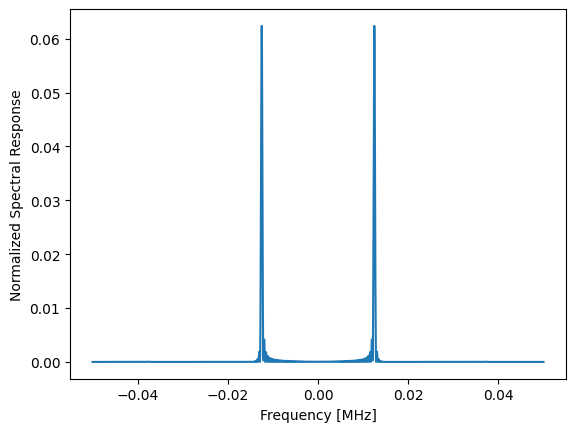

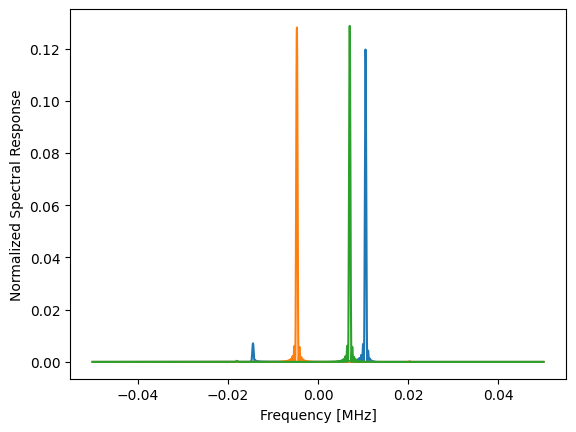

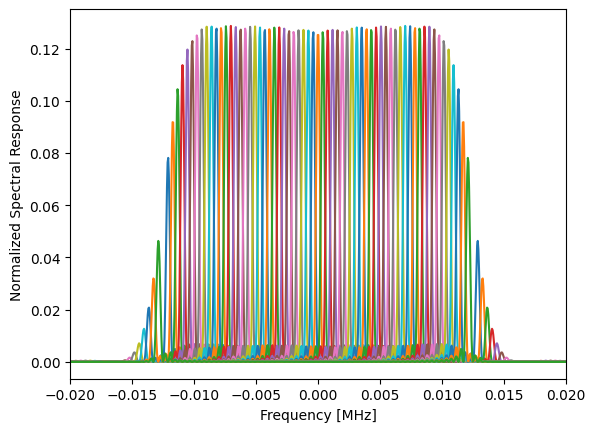

In [2]:
sim = fd.Simulator(None, None)

plt.figure()
plt.plot(sim.offset, sim.spec[:, 0])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Normalized Spectral Response")
plt.show()

plt.figure()
plt.plot(sim.offset, sim.spec[:, -5])
plt.plot(sim.offset, sim.spec[:, 20])
plt.plot(sim.offset, sim.spec[:, 50])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Normalized Spectral Response")
plt.show()

plt.figure()
plt.plot(sim.offset, sim.spec[:, 1:])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Normalized Spectral Response")
plt.xlim(-20/1e3, 20/1e3)
plt.show()

## Simulation Parameters and Constants

In [3]:
# FREQ = 30  # minimum frequency in MHz
# NCHANS = 64  # frequency channels
# NSIDE = 128
# THETA_MAX = 5  # extent of point src in degrees
# RM = 250  # rotation measure

# frequencies = np.linspace(0, 25/1e3, NCHANS) + FREQ  # 64 channels of 390 Hz width
# c = 299792458  # m / s

## Zenith Source

In [4]:
beam = fd.LuseeBeam("../data/hfss_lbl_3m_75deg.2port.fits")

hp.mollview(np.abs(beam.beam_X[0])**2, title="$E^{\\theta}$", min=0, max=2e8)
plt.show()
hp.mollview(np.abs(beam.beam_X[1])**2, title="$E^{\\phi}$", min=0, max=2e8)
plt.show()

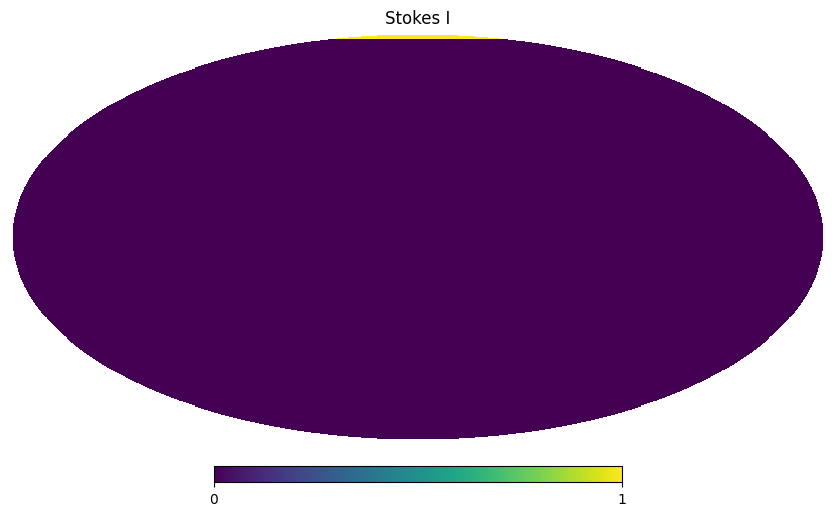

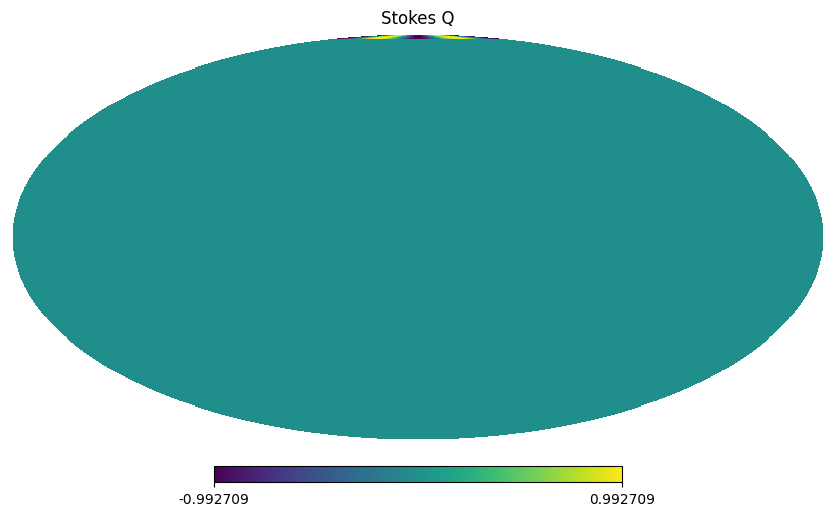

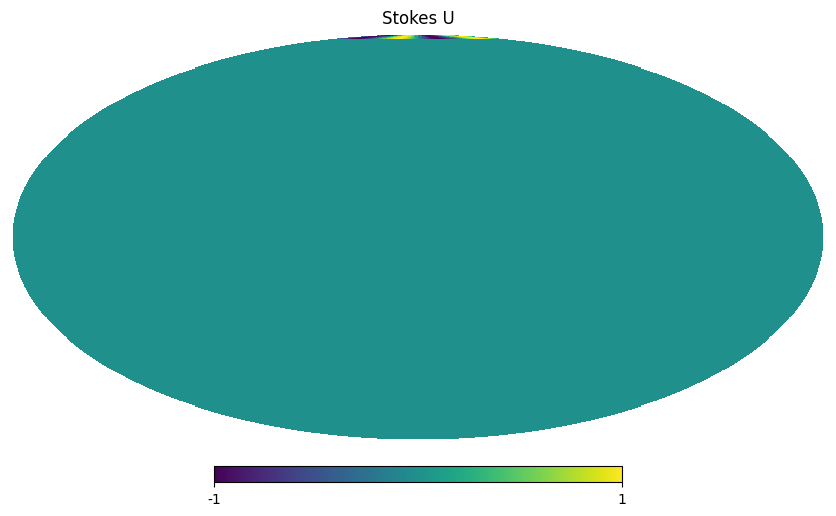

(1, 3, 196608)
(1, 3, 364)
(2000, 3, 364)


In [17]:
sky = fd.Sky.zeros(NSIDE, freq=FREQ)
sky.add_point_source(extent=THETA_MAX)  # 5 deg source at zenith
hp.mollview(sky.stokes[0, 0], title="Stokes I")
plt.show()
hp.mollview(sky.stokes[0, 1], title="Stokes Q")
plt.show()
hp.mollview(sky.stokes[0, 2], title="Stokes U")
plt.show()

print(sky.stokes.shape)
pix = sky.del_dark_pixels()  # pixels to keep
beam.del_pix(pix)
print(sky.stokes[..., sky.bright_pixels].shape)
sky.power_law(frequencies, -2.5)
print(sky.stokes.shape)

In [16]:
frequencies = offset - offset[0] + FREQ

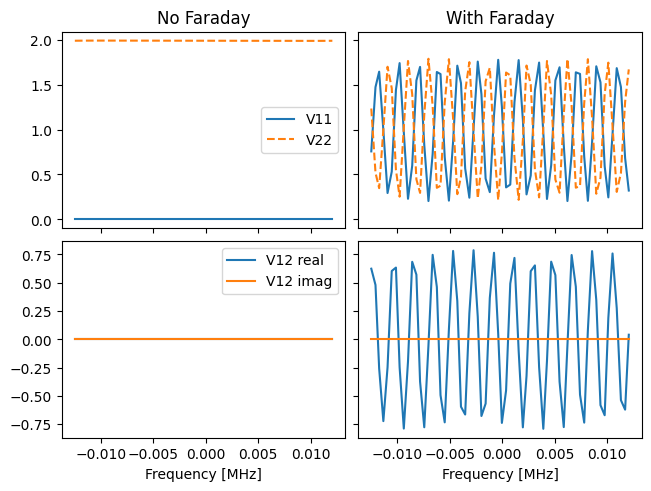

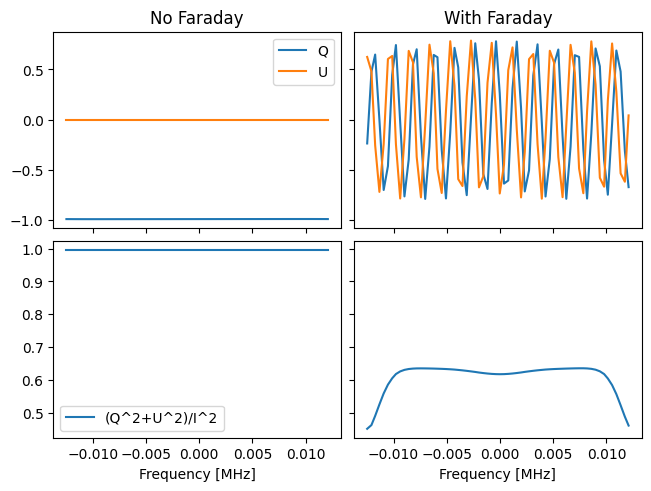

In [21]:
sky.apply_faraday(RM)
sim = fd.Simulator(beam, sky)
sim.run()
fd.sim.plot_vis(sim.freq, sim.vis, sim.vis_rot)
fd.sim.plot_stokes(sim.freq, sim.stokes, sim.stokes_rot)

In [ ]:
a